# Lessons:
-------

### Perpective Transform
-----

In [1]:
import os, sys
sys.path.insert(0, "/Users/sam/workspace/app/self-driving-vehicle")

from src import commons

(6, 6)


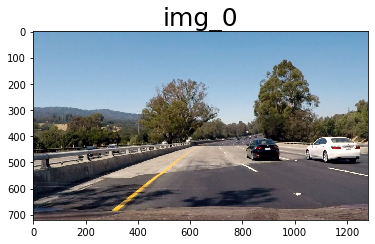

In [2]:
src1_image_path = './data/test_images/straight_lines1.jpg'
src2_image_path = "./data/test_images/test4.jpg"


src_image = commons.read_image(src2_image_path)
_ = commons.subplots()([src_image])

(6, 6)


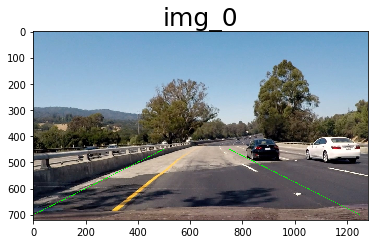

In [3]:
# We need atleast 4 points to 
import cv2
image = src_image.copy()
src_points = [(500, 450), (0, 700), (750, 450), (1250, 700)]
lineThickness = 2
cv2.line(image, src_points[0], src_points[1], (0,255,0), lineThickness)
cv2.line(image, src_points[2], src_points[3], (0,255,0), lineThickness)
_ = commons.subplots()([image])


In [4]:
import numpy as np
image_transformed = src_image.copy()
h, w, _ = image.shape
dst_points = [(0,0), (0, h-1), (w-1, 0), (w-1, h-1)]
M = cv2.getPerspectiveTransform(np.array(src_points).astype(np.float32), np.array(dst_points).astype(np.float32))
warp = cv2.warpPerspective(image_transformed, M, (w, h),flags=cv2.INTER_NEAREST)

(6, 6)


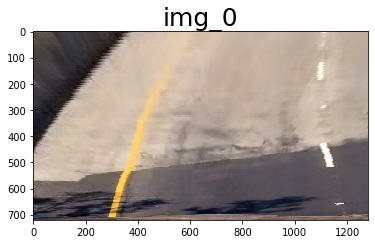

In [5]:
_ = commons.subplots()([warp])

In [6]:
from src.lane_line_advance.preprocess import Preprocess

absolute min=-231.0, absolute max=278.0
(18, 8)


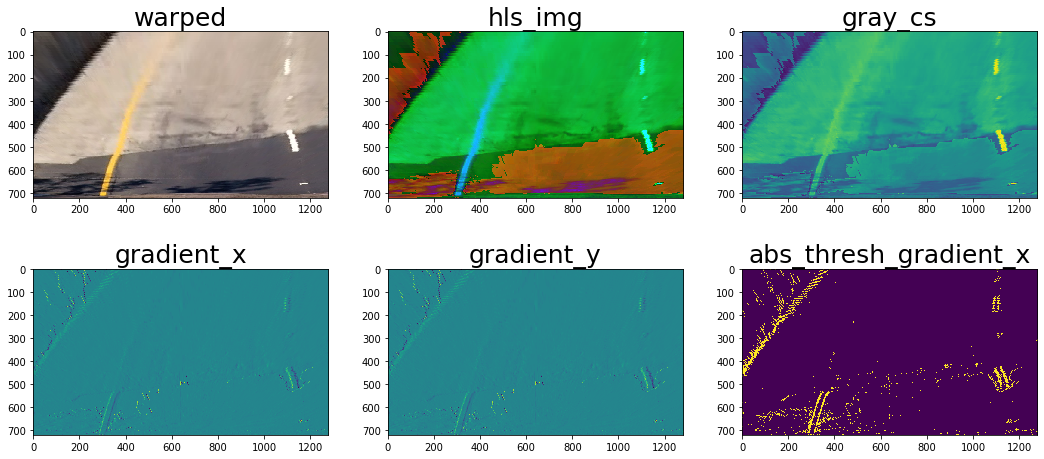

In [7]:
obj_preprocess = Preprocess(image=warp)
hls_img = obj_preprocess.apply_colorspace(cv2.COLOR_RGB2HLS)
gray_img = obj_preprocess.apply_colorspace(cv2.COLOR_RGB2GRAY)

gx, gy = obj_preprocess.apply_gradients(kernel_size=3)
x_abs_thresh_img = obj_preprocess.apply_absolute_thresh(axis="x", threshold=(20, 150))

_ = commons.subplots(nrows=2, ncols=3)(
    [warp, hls_img, gray_img, gx, gy, x_abs_thresh_img], 
    ["warped", "hls_img", "gray_cs", "gradient_x", "gradient_y", "abs_thresh_gradient_x"])

(18, 6)


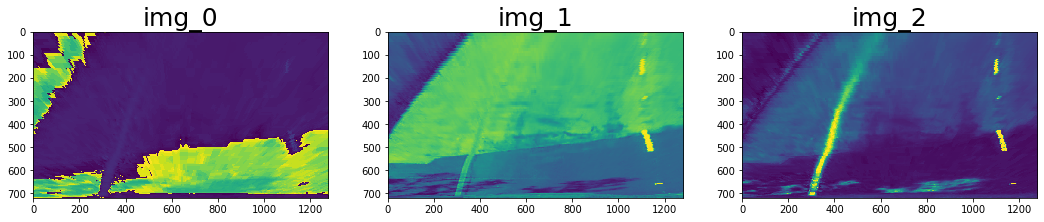

In [8]:
 h, l, s = [np.squeeze(i, axis=2) for i in np.dsplit(hls_img, 3)]
_ = commons.subplots(nrows=1, ncols=3)([h, l, s])

In [9]:
a = np.dstack([l, s, np.zeros(h.shape)]).astype(np.uint8)

(6, 6)


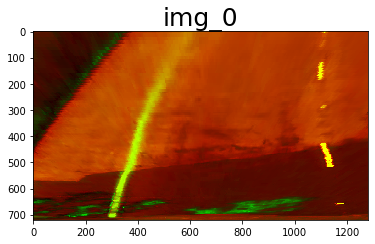

In [10]:
_ = commons.subplots()([a])

absolute min=-608.0, absolute max=601.0
orientation min=0.0, orientation max=1.5707963267948966
(18, 12)


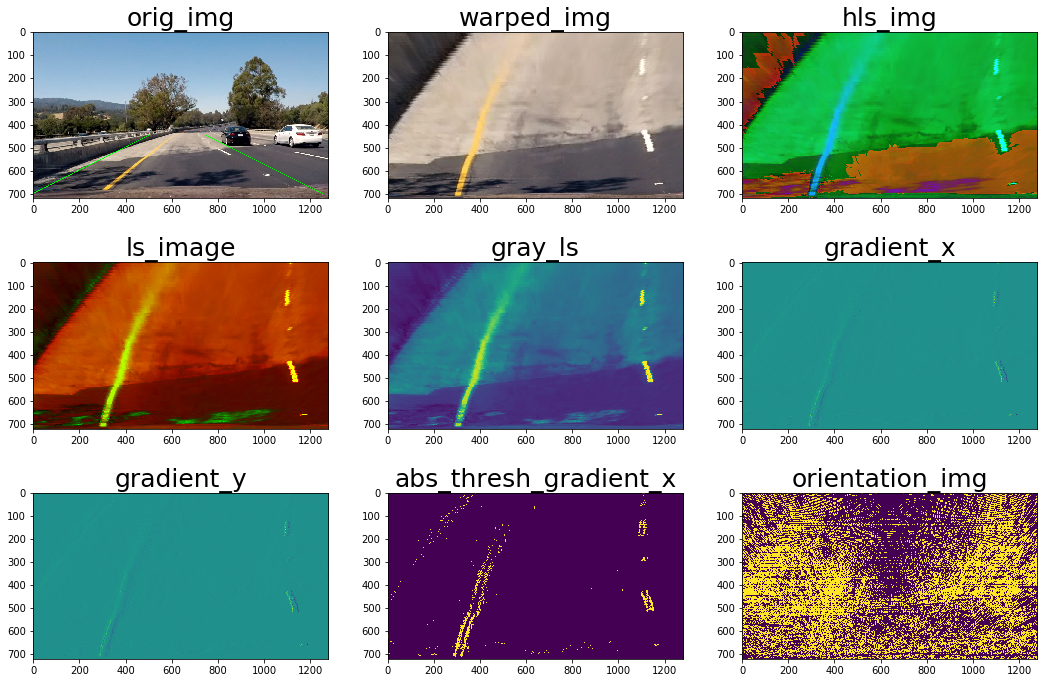

In [20]:
obj_pp = Preprocess(image=a)
ls_gray = obj_pp.apply_colorspace(cv2.COLOR_RGB2GRAY)
gx, gy = obj_pp.apply_gradients(kernel_size=3)
x_abs_thresh_img = obj_pp.apply_absolute_thresh(axis="x", threshold=(15, 150))
# mag_thresh_img = obj_pp.apply_magnitude_thresh(threshold=(20, 200))
orientation_img = obj_pp.apply_orientation_thresh(threshold=(0.3, 1.3))
_ = commons.subplots(nrows=3, ncols=3)(
        [image, warp, hls_img, a, ls_gray, gx, gy, x_abs_thresh_img, orientation_img],
        ["orig_img", "warped_img", "hls_img","ls_image", "gray_ls", 
         "gradient_x", "gradient_y", "abs_thresh_gradient_x", "orientation_img"])
    